In [1]:
!pip3 install tensorflow

In [2]:
# Import biblioteki numpy z aliasem 'np'.
# Biblioteka ta jest podstawą do obliczeń naukowych w Pythonie, oferuje wsparcie dla dużych,
# wielowymiarowych tablic i macierzy, wraz z kolekcją funkcji matematycznych do operowania na tych tablicach.
import numpy as np

# Import funkcji 'randint' z modułu 'random'.
# Funkcja ta generuje losową liczbę całkowitą w określonym zakresie, co jest przydatne w losowaniu, symulacjach,
# oraz innych zastosowaniach, gdzie potrzebne są losowe wartości całkowite.
from random import randint

# Import funkcji 'shuffle' z modułu 'sklearn.utils'.
# Funkcja ta losowo miesza kolekcje lub tablice. Jest szczególnie użyteczna w uczeniu maszynowym do mieszania danych
# przed podziałem na zestawy treningowe i testowe, aby usunąć wszelkie błędy, które mogłyby być wprowadzone przez kolejność danych.
from sklearn.utils import shuffle

# Import klasy 'MinMaxScaler' z modułu 'sklearn.preprocessing'.
# Klasa ta skaluje i transformuje cechy do określonego zakresu, zazwyczaj od 0 do 1, lub tak, aby minimalna i maksymalna
# wartość każdej cechy była skalowana do danego zakresu. Normalizacja ta może poprawić wydajność wielu algorytmów uczenia maszynowego.
from sklearn.preprocessing import MinMaxScaler

Dane testowe:
   - Testowany był eksperymentalny lek na osobach w wieku od 13 do 100 lat w badaniu klinicznym.
   - Badanie miało 2100 uczestników. Połowa była w wieku poniżej 65 lat, połowa 65 lat lub starsza.
   - Około 95% pacjentów w wieku 65 lat lub starszych doświadczyło skutków ubocznych.
   - Około 95% pacjentów poniżej 65 roku życia nie doświadczyło żadnych skutków ubocznych.

In [3]:
train_labels = []
train_samples = []

In [4]:
for i in range(50):
    # Około ~5% młodszych osób, które doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # Około ~5% starszych osób, które nie doświadczyły skutków ubocznych
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # Około ~95% młodszych osób, które nie doświadczyły skutków ubocznych
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # Około ~95% starszych osób, u które doświadczyły skutków ubocznych
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
print(train_samples)

[18, 79, 33, 91, 30, 79, 32, 68, 59, 97, 49, 88, 58, 66, 58, 91, 51, 96, 38, 87, 59, 97, 55, 97, 26, 65, 16, 91, 46, 95, 25, 77, 48, 90, 61, 69, 40, 67, 13, 95, 33, 81, 38, 80, 63, 92, 48, 91, 39, 68, 54, 76, 26, 66, 34, 93, 51, 71, 46, 97, 43, 70, 24, 80, 59, 90, 62, 71, 52, 89, 64, 79, 23, 80, 46, 98, 40, 74, 36, 82, 57, 84, 42, 80, 21, 65, 59, 97, 36, 94, 13, 74, 53, 82, 49, 84, 14, 82, 51, 96, 20, 79, 48, 98, 44, 72, 38, 76, 41, 96, 26, 68, 36, 83, 38, 96, 37, 76, 44, 92, 44, 65, 32, 88, 41, 73, 49, 78, 28, 73, 51, 85, 23, 96, 58, 94, 43, 84, 48, 86, 42, 93, 42, 86, 53, 95, 41, 82, 14, 89, 55, 78, 39, 76, 21, 66, 25, 79, 54, 69, 22, 99, 62, 66, 34, 69, 22, 70, 19, 84, 22, 93, 50, 86, 36, 85, 22, 78, 33, 80, 37, 74, 57, 89, 39, 78, 56, 89, 38, 100, 28, 81, 55, 90, 59, 89, 17, 84, 49, 93, 47, 69, 27, 71, 40, 72, 44, 94, 23, 74, 18, 75, 14, 84, 29, 78, 13, 94, 23, 92, 17, 100, 41, 87, 14, 86, 22, 75, 61, 90, 37, 82, 24, 82, 63, 97, 50, 87, 40, 73, 15, 92, 49, 84, 62, 75, 39, 67, 14, 6

In [6]:
print(train_labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 

In [9]:
# Przekształcenie w tablice NumPy
train_labels = np.array(train_labels)
# Przekształcenie w tablice NumPy
train_samples = np.array(train_samples)
# Użycie funcji losowania do przekształcenia  wyszkolonych etykiet oraz wyszkolonych próbek
# względem siebie w celu pozbycia sie narzuconego porządku z procesu generowania danych
train_labels, train_samples = shuffle(train_labels, train_samples)

In [10]:
print(train_labels)
print(train_samples)

[0 0 1 ... 0 1 1]
[48 13 85 ... 34 98 86]


In [11]:
# Tworzenie instancji klasy MinMaxScaler. Ten scaler normalizuje dane tak, aby każda cecha (kolumna danych)
# miała wartości w określonym zakresie, tutaj od 0 do 1. Jest to przydatne w uczeniu maszynowym, ponieważ
# wiele algorytmów działa lepiej, gdy cechy są skalowane w ten sposób.
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
# Stosowanie metody fit_transform klasy MinMaxScaler do danych treningowych. Metoda 'fit_transform' najpierw dopasowuje scaler
# do danych (obliczając minimalne i maksymalne wartości cech), a następnie transformuje te dane do określonego zakresu (0,1).
# Operacja 'reshape(-1,1)' zmienia kształt tablicy 'train_samples' na 2-wymiarową (kolumnową), co jest wymagane przez scaler.
# W wyniku tej operacji, 'scaled_train_samples' zawiera przeskalowane wartości próbek treningowych, które są teraz gotowe
# do wykorzystania w algorytmach uczenia maszynowego.
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [13]:
print(scaled_train_samples)

[[0.40229885]
 [0.        ]
 [0.82758621]
 ...
 [0.24137931]
 [0.97701149]
 [0.83908046]]


In [17]:
pip install tensorflow

In [16]:
# Importowanie modułu tensorflow pod aliasem tf.
# TensorFlow to biblioteka do obliczeń numerycznych, która umożliwia efektywne trenowanie i implementację modeli uczenia maszynowego
# na różnych platformach, od prostych urządzeń do skomplikowanych klastrów serwerów.
import tensorflow as tf

# Importowanie modułu keras z pakietu tensorflow.
# Keras to API wysokiego poziomu do budowania i trenowania modeli głębokiego uczenia, które jest zintegrowane z TensorFlow,
# ułatwiające szybkie prototypowanie i eksperymentowanie.
from tensorflow import keras

# Importowanie klasy Sequential z modułu tensorflow.keras.models.
# Sequential to rodzaj modelu w Keras, który jest liniowym stosunkiem warstw, gdzie każda warstwa ma dokładnie jeden wejściowy tensor
# i jeden wyjściowy tensor, co ułatwia tworzenie prostych architektur.
from tensorflow.keras.models import Sequential

# Importowanie funkcji Activation i klasy Dense z modułu tensorflow.keras.layers.
# Activation to warstwa, która stosuje funkcję aktywacji do wyjścia poprzedniej warstwy.
# Dense to standardowa warstwa sieci neuronowej, która jest gęsto połączona, co oznacza, że każdy neuron wejściowy
# jest połączony z każdym neuronem wyjściowym.
# Input to funkcja używana do definiowania warstwy wejściowej modelu. Pozwala określić kształt danych wejściowych,
# który jest wymagany przez sieć, w tym liczbę cech, które sieć będzie przetwarzać. Jest to kluczowy element
# przy budowaniu modeli w Keras, gdyż definiuje punkt wejścia danych do modelu.
from tensorflow.keras.layers import Activation, Dense, Input

# Importowanie klasy Adam z modułu tensorflow.keras.optimizers.
# Adam to algorytm optymalizacji, który może być używany do aktualizacji wag sieci neuronowych na podstawie danych treningowych.
from tensorflow.keras.optimizers import Adam

# Importowanie funkcji categorical_crossentropy z modułu tensorflow.keras.metrics.
# Categorical_crossentropy to funkcja straty, która jest często używana w zadaniach klasyfikacji, gdzie etykiety są kodowane jako wektory jedno gorące.
from tensorflow.keras.metrics import categorical_crossentropy

In [18]:
# Wylistowanie dostępnych fizycznych urządzeń typu GPU za pomocą TensorFlow.
# Ta funkcja pozwala na zidentyfikowanie wszystkich dostępnych GPU w systemie, co jest przydatne, gdy chcemy skonfigurować TensorFlow
# do korzystania z określonych urządzeń sprzętowych.
physical_devices = tf.config.experimental.list_physical_devices('GPU')

# Sprawdzanie, czy jakiekolwiek GPU są dostępne
if physical_devices:
    # Jeśli GPU są dostępne, ustaw wzrost pamięci na pierwszym dostępnym GPU.
    # Wzrost pamięci oznacza, że TensorFlow nie zajmie całej dostępnej pamięci na GPU od razu, ale będzie zwiększał jej użycie
    # w miarę potrzeby. Jest to przydatne, aby uniknąć konfliktów z innymi procesami, które mogą potrzebować GPU.
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

    # Wypisanie liczby dostępnych GPU.
    print("Num GPUs Available: ", len(physical_devices))
else:
    # Jeśli nie ma dostępnych GPU, również wypisanie tej informacji.
    print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  0


In [20]:
# Inicjalizacja modelu jako instancja klasy sekwencyjnej.
# Model sekwencyjny to liniowy stos warstw, gdzie kolejność dodawania warstw odzwierciedla przepływ danych.
model = Sequential(
    [
        # Pierwsza warstwa definiująca kształt wejściowy.
        # Specyfikacja 'shape=(1,)' oznacza, że każdy wejściowy przykład danych będzie miał 1 cechę.
        Input(shape=(1,)),

        # Pierwsza warstwa gęsta z 16 neuronami, funkcja aktywacji ReLU.
        # 'ReLU' (Rectified Linear Unit) jest popularną funkcją aktywacji stosowaną w sieciach neuronowych,
        # która sprawia, że wszystkie wartości wejściowe mniejsze od zera są zerowane.
        Dense(units=16, activation='relu'),

        # Druga warstwa gęsta z 32 neuronami, funkcja aktywacji ReLU.
        # Więcej neuronów i kolejna warstwa ReLU zwiększają zdolność modelu do uczenia się skomplikowanych wzorców w danych.
        Dense(units=32, activation='relu'),

        # Warstwa wyjściowa z 2 jednostkami, funkcja aktywacji softmax.
        # Softmax sprawia, że wyjścia są interpretowane jako prawdopodobieństwa przynależności do jednej z dwóch klas.
        # Jest to typowa konfiguracja dla zadań klasyfikacyjnych z dwoma klasami wynikowymi.
        Dense(units=2, activation='softmax')
    ]
)

In [21]:
# Wywołanie metody summary() na obiekcie modelu.
# Metoda summary() wyświetla podsumowanie architektury modelu, w tym nazwy warstw, ich kształty (wymiary),
# oraz liczbę parametrów (zarówno trenowalnych, jak i nietrenowalnych) w każdej warstwie.
# Jest to przydatne narzędzie do szybkiego przeglądu struktury modelu i sprawdzenia, czy wszystkie warstwy są prawidłowo zdefiniowane.
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Określenie dla funkcji kompilacji jakiego optimizera chcemy użyć (Adam).
# Podajemy decyzje dot. użycia atomu optimalizatora z szybkością uczenia się (0.0001) jest on bardzo popularny
# Określamy typ straty (sparse_categorical_crossentropy)
# Określamy jakie metryki chcemy zobaczyć. Dotyczy to tylko wydajności modelu (na podstawie czego chcemy móc ocenić nasz model)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Trenowanie modelu ma miejsce za każdym razem gdy wywołujemy funkcję dopasowania (fit)
# Określenie parametru x - czyli nasze dane wejściowe (obecnie przechowywane w skalowalnej zmiennej próbek)
# Określenie parametru y - czyli nasze dane docelowe (obecnie przechowywane w zmiennej etykiet)
# Określenie wielkości partii, którą chcemy wykorzystać do szkolenia (batch_size) - ile próbek znajduje się w jednej partii,
#                                  sktóre mają zostać przesłane i przetworzone przez sieci neuronowe jednocześnie (10)
# Ilość epok - oznacza to, że model będzie przetwarzał lub trenował wszystkie dane ze zbioru danych 30 razy przed zakończeniem
#                                  całego procesu szkoleniowego
# Shuffle, które ustawiamy na True (domyślnie jest ustawione na True - chodzi o pokazanie, że takie ustawienie jest) - ten parametr oznacza
#                                  że dane są domyslnie tasowane (to dobrze bo chcemy wymazać porządek danych przed przekazaniem
#                                  danych do modelu - model nie bedzie się więc uczył czegokolwiek na temat kolejności danych).
# Ostatni parametr to opcja pozwalająca zobaczyć dane wejsciowe za każdym razem, gdy uruchamiamy tę komendę funkcji dopasowania (fit).
#                                  Możemy go ustawić na 1 lub 2. 2 to najbardziej szczegółowy poziom pod względem komunikatów wejściowych.


model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/300
210/210 - 0s - loss: 0.2632 - accuracy: 0.9362 - 445ms/epoch - 2ms/step
Epoch 2/300
210/210 - 1s - loss: 0.2615 - accuracy: 0.9348 - 516ms/epoch - 2ms/step
Epoch 3/300
210/210 - 1s - loss: 0.2603 - accuracy: 0.9357 - 559ms/epoch - 3ms/step
Epoch 4/300
210/210 - 1s - loss: 0.2588 - accuracy: 0.9395 - 646ms/epoch - 3ms/step
Epoch 5/300
210/210 - 0s - loss: 0.2577 - accuracy: 0.9348 - 357ms/epoch - 2ms/step
Epoch 6/300
210/210 - 0s - loss: 0.2566 - accuracy: 0.9390 - 286ms/epoch - 1ms/step
Epoch 7/300
210/210 - 0s - loss: 0.2556 - accuracy: 0.9381 - 302ms/epoch - 1ms/step
Epoch 8/300
210/210 - 0s - loss: 0.2548 - accuracy: 0.9395 - 274ms/epoch - 1ms/step
Epoch 9/300
210/210 - 0s - loss: 0.2539 - accuracy: 0.9386 - 282ms/epoch - 1ms/step
Epoch 10/300
210/210 - 0s - loss: 0.2530 - accuracy: 0.9414 - 311ms/epoch - 1ms/step
Epoch 11/300
210/210 - 0s - loss: 0.2524 - accuracy: 0.9390 - 290ms/epoch - 1ms/step
Epoch 12/300
210/210 - 0s - loss: 0.2515 - accuracy: 0.9419 - 314ms/epoch 

In [25]:
# x=scaled_train_samples określa dane wejściowe do trenowania, które zostały przeskalowane wcześniej.
# y=train_labels określa prawdziwe etykiety dla danych treningowych.
# validation_split=0.1 wskazuje, że 10% danych treningowych powinno być użyte jako zestaw walidacyjny.
# batch_size=10 określa liczbę próbek, które będą przetwarzane w pojedynczej partii.
# epochs=30 ustawia liczbę epok treningowych, czyli ile razy cały zestaw danych przejdzie przez sieć neuronową.
# shuffle=True wskazuje, że dane treningowe powinny być tasowane przed każdą epoką.
# verbose=2 określa, jak wiele informacji o procesie trenowania powinno być wyświetlane (2 oznacza,
#                                                    że zostanie wyświetlony jeden wiersz na epokę).
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.2155 - accuracy: 0.9524 - val_loss: 0.1905 - val_accuracy: 0.9524 - 767ms/epoch - 4ms/step
Epoch 2/30
189/189 - 1s - loss: 0.2152 - accuracy: 0.9524 - val_loss: 0.1912 - val_accuracy: 0.9524 - 519ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.2152 - accuracy: 0.9524 - val_loss: 0.1903 - val_accuracy: 0.9524 - 535ms/epoch - 3ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2152 - accuracy: 0.9524 - val_loss: 0.1910 - val_accuracy: 0.9524 - 345ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2151 - accuracy: 0.9524 - val_loss: 0.1907 - val_accuracy: 0.9524 - 349ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2150 - accuracy: 0.9524 - val_loss: 0.1904 - val_accuracy: 0.9524 - 303ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2151 - accuracy: 0.9524 - val_loss: 0.1910 - val_accuracy: 0.9524 - 329ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2149 - accuracy: 0.9524 - val_loss: 0.1906 - val_accuracy: 0.9524 - 303ms/epoch - 2ms/step


In [26]:
# 'predictions' to zmienna, która będzie przechowywać wyniki przewidywań modelu.
# Metoda 'predict' modelu z Keras zostanie użyta do wygenerowania przewidywań.
# 'x=scaled_train_samples' wskazuje, że jako dane wejściowe dla przewidywań użyte będą 'scaled_train_samples',
# które są przeskalowanymi próbkami treningowymi.
# 'batch_size=10' określa, że przewidywania będą generowane partiami po 10 próbek. Jest to szczególnie ważne
# przy przetwarzaniu dużych zbiorów danych, ponieważ pomaga to zmniejszyć zużycie pamięci.
# 'verbose=0' oznacza, że podczas wykonywania metody 'predict' nie będą wyświetlane żadne wiadomości
# (poziom szczegółowości logowania jest ustawiony na 0, co oznacza brak wyjścia).
predictions = model.predict(x=scaled_train_samples, batch_size=10, verbose=0)

In [27]:
for i in predictions:
    print(i)

[0.9531013  0.04689868]
[0.96585864 0.03414135]
[0.04213288 0.9578672 ]
[0.03714562 0.96285444]
[0.0612058 0.9387942]
[0.9619639 0.0380361]
[0.02536773 0.97463226]
[0.95676    0.04324006]
[0.5634043  0.43659568]
[0.03486974 0.9651302 ]
[0.11160238 0.8883977 ]
[0.06919129 0.9308087 ]
[0.95775414 0.04224581]
[0.093533   0.90646696]
[0.11160238 0.8883977 ]
[0.9587265  0.04127343]
[0.0829887  0.91701144]
[0.9661401  0.03385987]
[0.20060566 0.79939437]
[0.08298869 0.9170113 ]
[0.9014354  0.09856462]
[0.01725736 0.9827426 ]
[0.10526329 0.8947367 ]
[0.9014354  0.09856462]
[0.01962881 0.9803712 ]
[0.06919129 0.9308087 ]
[0.86903983 0.13096017]
[0.03272855 0.96727145]
[0.07353663 0.92646337]
[0.92914826 0.07085176]
[0.04213288 0.9578672 ]
[0.30223453 0.6977654 ]
[0.01962881 0.9803712 ]
[0.9596774  0.04032248]
[0.9596774  0.04032248]
[0.02379562 0.9762043 ]
[0.08811848 0.9118815 ]
[0.95775414 0.04224581]
[0.9653652  0.03463489]
[0.9637028  0.03629719]
[0.03486974 0.9651302 ]
[0.9596774  0.040322

In [28]:
# Zastosowanie funkcji 'argmax' z biblioteki NumPy na wynikach przewidywań (predictions) modelu.
# Funkcja 'argmax' zwraca indeksy największych wartości wzdłuż podanej osi, co jest przydatne
# w przypadku modeli klasyfikacji, gdzie przewidywania są zwracane jako zestaw prawdopodobieństw
# przynależności do poszczególnych klas. W tym kontekście, argmax zostanie użyte do wybrania
# indeksu o najwyższym prawdopodobieństwie, który odpowiada przewidywanej klasie.
# 'axis=1' oznacza, że szukamy indeksów największych wartości w wierszach, nie kolumnach,
# co odpowiada wyborowi klasy z listy prawdopodobieństw dla każdej próbki.
rounded_predictions = np.argmax(predictions, axis=-1)

In [29]:
for i in rounded_predictions:
    print(i)

0
0
1
1
1
0
1
0
0
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
0
1
1
0
0
1
0
0
0
1
0
1
1
1
1
0
0
1
0
0
1
1
0
1
1
1
0
0
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
0
1
1
0
0
0
1
1
1
0
0
0
0
1
0
0
1
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
1
1
1
1
0
1
0
0
1
0
1
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
0
1
1
0
1
1
1
0
0
1
0
0
1
1
0
1
1
1
1
1
0
1
0
0
0
1
0
0
1
0
1
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
0
1
1
1
0
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
1
1
1
1
0
1
1
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
1
0
0
1
1
1
1
0
0
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
1
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
1
1
0
0
0
0
0
1
1
1
0
1
1
1
0
0
1
0
0
1
0
1
1
1
0
0
1
1
1
0
1
0
0
0
1
0
1
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
0
0
1
0
1
1
0
1
0
1
1
1
1
1
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
1
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
0
1
1
0
1
0
1
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
0
1
0
1


In [30]:
# Włączenie integracji matplotlib z notatnikiem Jupyter, pozwalające na wyświetlanie wykresów bezpośrednio pod komórkami kodu.
%matplotlib inline

# Importowanie funkcji confusion_matrix z modułu sklearn.metrics.
# Confusion matrix (macierz błędów) to narzędzie do oceny wydajności modelu klasyfikacyjnego,
# prezentujące liczby predykcji dla każdej klasy w stosunku do rzeczywistych etykiet.
from sklearn.metrics import confusion_matrix

# Importowanie modułu itertools, który oferuje różne funkcje pomocnicze optymalizujące
# iteracyjne zadania (takie jak produkty kartezjańskie, permutacje, kombinacje itp.).
import itertools

# Importowanie biblioteki matplotlib.pyplot jako plt.
# Matplotlib to biblioteka do tworzenia statycznych, interaktywnych wykresów i wizualizacji w Pythonie.
import matplotlib.pyplot as plt

# Obliczanie macierzy błędów na podstawie rzeczywistych etykiet i przewidzianych przez model.
# 'y_true' to rzeczywiste etykiety, a 'rounded_predictions' to etykiety przewidziane przez model.
# Wynik, 'cm', jest dwuwymiarową tablicą, gdzie indeksy wierszy oznaczają rzeczywiste klasy,
# a indeksy kolumn wskazują przewidywane klasy.
cm = confusion_matrix(y_true=train_labels, y_pred=rounded_predictions)


In [31]:
# Definicja funkcji plot_confusion_matrix z parametrami: macierz błędów (cm), lista nazw klas, flaga normalizacji,
# tytuł wykresu i mapa kolorów.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Macierz pomyłek',
                          cmap=plt.cm.Blues):

    # Wieloliniowy komentarz dokumentujący funkcję, opisujący jej działanie i parametry.
    """
    To funkcja drukuje i wyświetla macierz pomyłek.
    Normalizację można zastosować, ustawiając normalize=True.
    """

    # Wyświetlenie macierzy pomyłek jako obrazu z wykorzystaniem mapy kolorów cmap.
    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    # Ustawienie tytułu wykresu.
    plt.title(title)

    # Dodanie paska kolorów (colorbar), który pokazuje zakres wartości reprezentowanych przez kolory na mapie.
    plt.colorbar()

    # Ustalenie pozycji, na których mają być wyświetlane etykiety (tutaj dla klas).
    tick_marks = np.arange(len(classes))

    # Ustawienie etykiet osi X z nazwami klas, obrót etykiet o 45 stopni dla lepszej czytelności.
    plt.xticks(tick_marks, classes, rotation=45)

    # Ustawienie etykiet osi Y z nazwami klas.
    plt.yticks(tick_marks, classes)

    # Warunek sprawdzający, czy użytkownik chce znormalizować macierz pomyłek.
    if normalize:
        # Normalizacja wartości macierzy pomyłek, dzielenie każdego wiersza przez sumę wartości w wierszu,
        # przekształcając liczby w prawdopodobieństwa.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # Wydrukowanie informacji o normalizacji.
        print("Znormalizowana macierz pomyłek")
    else:
        # Wydrukowanie informacji, że macierz nie jest normalizowana.
        print('Macierz pomyłek, bez normalizacji')

    # Wydrukowanie wartości macierzy pomyłek w konsoli.
    print(cm)

    # Ustalenie progu dla decyzji o kolorze tekstu na podstawie maksymalnej wartości w macierzy.
    thresh = cm.max() / 2.

    # Iterowanie przez elementy macierzy (indeksy i wartości), aby dodać teksty do każdego pola macierzy.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # Dodanie tekstu do każdego pola macierzy, gdzie tekst jest sformatowany jako liczba zmiennoprzecinkowa
        # z dwoma miejscami po przecinku. Ustawienie tekstu na środku pola.
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 # Ustawienie koloru tekstu na biały, jeśli wartość jest większa niż połowa maksimum,
                 # w przeciwnym przypadku kolor czarny dla lepszej czytelności.
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustowanie układu elementów na wykresie, by wszystkie elementy były dobrze widoczne i nie nakładały się na siebie.
    plt.tight_layout()

    # Dodanie etykiety osi Y opisującej, co reprezentują wartości na tej osi (prawdziwe klasy).
    plt.ylabel('Prawdziwa etykieta')

    # Dodanie etykiety osi X opisującej, co reprezentują wartości na tej osi (przewidziane klasy).
    plt.xlabel('Przewidziana etykieta')



Znormalizowana macierz pomyłek
[[0.95238095 0.04761905]
 [0.04761905 0.95238095]]


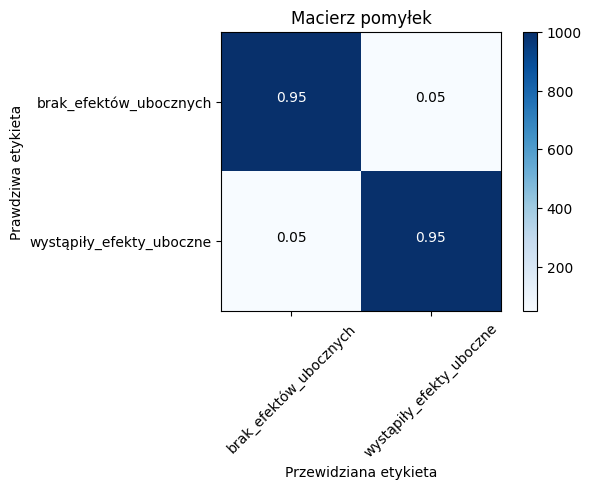

In [34]:
# Etykiety do wykorzystania na osiach wykresu macierzy pomyłek
cm_plot_labels = ['brak_efektów_ubocznych', 'wystąpiły_efekty_uboczne']
# Wywołanie funkcji do rysowania macierzy pomyłek z odpowiednimi parametrami
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, normalize=True, title='Macierz pomyłek')